<br>Với $y_{ik}$ là các one-hot vector thể hiện dữ liệu thuộc lớp nào thỏa mạn tiên đề dưới đây:</br>
<center>$y_{ik} \in \{0, 1\},~~~ \sum_{k = 1}^K y_{ik} = 1 ~~~ (1)$</center>
<br>ta gọi $m_k$ là các **representative** (đại diện) cho `cluster` **k** bất kỳ, $x_i$ là các điểm dữ liệu **nằm trong `cluster` k**, ta có khoảng cách (sai lệch) giữa các điểm dữ liệu đó và **representative** được tính theo công thức:</br>
<center>$\|\mathbf{x}_i - \mathbf{m}_k\|_2^2$</center>
<br>**Chú thích**: $\|A\|_2$ khoảng cách Euclide của $A$, nên $\|A\|_2^2$ là tổng bình phương khoảng cách Euclide của A</br>

<br>Do $x_i$ nằm trong `cluster` $k$ nên ta chỉ cần xét khoảng cách (sai lệch) của các điểm chỉ thuộc `cluster` đó với **representative** $m_k$ của `cluster` đó, ý tưởng là hãy nhân khoảng cách với one-hot vector $y_{ik}$ đã định nghĩa tại $(1)$, bằng cách đó nếu $x_i$ thuộc cluster $k$ thì khoảng cách sẽ được cộng dồn vô vì tại đó one-hot bằng $1$, ngược lại nếu không thuộc $k$ thì sẽ bằng $0$ vì tại đó one-hot bằng $0$ ta sẽ có công thức:</br>
<center>$y_{ik}\|\mathbf{x}_i - \mathbf{m}_k\|_2^2 =  \sum_{j=1}^K y_{ij}\|\mathbf{x}_i - \mathbf{m}_j\|_2^2$</center>
<br>Sai số cho toàn bộ dữ liệu sẽ là:</br>
<center>$\mathcal{L}(\mathbf{Y}, \mathbf{M}) = \sum_{i=1}^N\sum_{j=1}^K y_{ij} \|\mathbf{x}_i - \mathbf{m}_j\|_2^2$</center>
<center>Với $\mathbf{Y} = [\mathbf{y}_1; \mathbf{y}_2; \dots; \mathbf{y}_N], \mathbf{M} = [\mathbf{m}_1, \mathbf{m}_2, \dots \mathbf{m}_K]$</center>

### Giải bài toán tối ưu cho lost function:

<center>$\mathbf{Y}, \mathbf{M} = \arg \min_{\mathbf{Y}, \mathbf{M}} (\sum_{i=1}^N\sum_{j=1}^K y_{ij} \|\mathbf{x}_i - \mathbf{m}_j\|_2^2)~~~\text{subject to:}~(y_{ij} \in \{0, 1\}~~ \forall i, j;~~~ \sum_{j = 1}^K y_{ij} = 1~~~\forall i)~~~~~(2)$</center>
> <br>Nghiệm của pt $(2)$ ở đây chính là tìm các vector chứa giá trị của label sau khi đã clustering gọi là $\mathbf{Y}$ và đại diện **representative** gọi là $\mathbf{M}$ sao cho vế phải của pt $(2)$ đạt giá trị nhỏ nhất với điều kiện kẹp dưới</br>

<note>***$\arg \min_{\mathbf{x}}(x^2 -2x + 1)$ : có nghĩa là tại giá trị nào của $x$ thỏa mãn sao cho hàm $f(x) = x^2 -2x + 1$ đạt giá trị nhỏ nhất, ở đây là $\min f(x) = 1$ và $\arg \min_{x} = 0$ (ở lớp 12 ta hay nói tại $x = 0$ thì $f(x)$ đạt giá trị nhỏ nhất)***</note>

<br>**PHÁT SINH VẤN ĐỀ**: như ta thấy rất khó để giải ra nghiệm tối ưu cho bài toán ở phương trình $(2)$ do ta $y_{ij}$ bị ràng buộc bởi điều kiện phải là $0$ hoặc $1$ tức là số nguyên rất khó để có thể giải theo phương pháp , vấn đề này trong toán học được gọi là Mixed-Integer Programming (MIP) Problems (Bài toán điều kiện biến là số nguyên) cụ thể hơn bài toán này được gọi chính xác là "Linear Problems" (LP) do điều kiện của bài này là bool hay binary.</br>
#### <br>Đề xuất cách giải cho bài toán này đó chính là giải xen kẽ $\mathbf{Y}$ và $\mathbf{M}$. (giải thuật này rất hay gặp trong các bài toán tối ưu hóa)</br>
<br>**Bước 1: Cố định $\mathbf{M}$, tìm $\mathbf{Y}$**: Giả sử đã tìm được các đại diện **representative** $M$ ta coi $m_j$ như 1 hằng số ta tối ưu theo $Y$ để lost fucntion nhỏ nhất, khi đó bài toán trở thành tìm label cho sai lệch là nhỏ nhất dựa trên các điểm $x_i$</br>
<center>$\mathbf{Y} = \arg\min_{\mathbf{Y}} \sum_{j=1}^K y_{ij}\|\mathbf{x}_i - \mathbf{m}_j\|_2^2~~\text{subject to:} ~~ y_{ij} \in \{0, 1\}~~ \forall j;~~~ \sum_{j = 1}^K y_{ij} = 1 ~~~ (3)$</center>
<br>Do $\mathbf{Y}$ chứa $y_j$ với $j$ chạy từ 1 tới $k$ `cluster` và chỉ 1 trong số các $y_j$ đó bằng 1 nên ta có thể nói là, tìm j sao cho tại $j$ thì $y_j = 1$ vì tổng của vế phải pt$(3)$ chỉ còn duy nhất giá trị tại $y_j = 1$, từ đó ta rút gọn pt $(3)$ lại:</br>
<center>$j = \arg\min_{j} \|\mathbf{x}_i - \mathbf{m}_j\|_2^2~~~(*)$</center>
<br>$\|\mathbf{x}_i - \mathbf{m}_j\|_2^2$ chính là sai lệch của điểm dữ liệu $x_i$ so với **representative** của `cluster` $j$. </br>

<br>**Bước 2: Cố định $\mathbf{Y}$, tìm $\mathbf{M}$**: Giả sử đã tìm được `cluster` label $\mathbf{Y}$ cho các điểm, hãy tìm **representative** $\mathbf{M}$ mới cho mỗi `cluster` để hàm mất mát đạt giá trị nhỏ nhất.</br>
<center>$\mathbf{m}_j = \arg\min_{\mathbf{m}_j} \sum_{i = 1}^{N} y_{ij}\|\mathbf{x}_i - \mathbf{m}_j \|_2^2$</center>
<br>Hàm số $\sum_{i = 1}^{N} y_{ij}\|\mathbf{x}_i - \mathbf{m}_j \|_2^2$ liên tục và có đạo hàm xác định tại mọi điểm trên tập xác định của nó nên ta có thể tính giá trị nhỏ nhất của nó bằng cách lấy đạo hàm bằng 0 (($f'(x) = 0$) hay ($\frac{\partial f(\mathbf{x})}{\partial \mathbf{x}} = 0$)) và giải phương trình như kiến thức lớp 11.</br>

<br>Đặt toàn bộ hàm số $\mathbf{m}_j = \arg\min_{\mathbf{m}_j} \sum_{i = 1}^{N} y_{ij}\|\mathbf{x}_i - \mathbf{m}_j \|_2^2$ là $F(\mathbf{m}_i)$ ta có thể rút gọi pt$(3)$ thành:</br>

<center>$\frac{\partial F(\mathbf{m}_j)}{\partial \mathbf{m}_j} = 2\sum_{i=1}^N y_{ij}(\mathbf{m}_j - \mathbf{x}_i)$</center>

<br>Giải phương trình đạo hàm bằng 0:</br>

<center>$\mathbf{m}_j \sum_{i=1}^N y_{ij} = \sum_{i=1}^N y_{ij} \mathbf{x}_i$</center>

<center>$\Rightarrow \mathbf{m}_j = \frac{ \sum_{i=1}^N y_{ij} \mathbf{x}_i}{\sum_{i=1}^N y_{ij}}~~~(**)$</center>

<br>Nếu để ý một chút, chúng ta sẽ thấy rằng mẫu số chính là phép đếm số lượng các điểm dữ liệu trong cluster $j$. Còn tử số chính là tổng các điểm dữ liệu trong cluster $j$. (Dựa trên điều kiện ràng buộc của các $y_{ij}$ ta có thể thấy được điều đó).

<br>**KẾT LUẬN: từ $(*)$ ta kết luận tìm $j$ sao cho khoảng cách từ điểm dữ liệu $x_i$ so với representative của `cluster` bé nhất.
<br> từ $(**)$ kết luận tìm $m_j$ chính là tìm trung bình cộng của các điểm trong cùng `cluster` $j$**</br>

In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [39]:
def kmeans_display(X, label, kmediods = False, mediods_centers = None):
    #return maximun of label values and plus by 1
    #cause we have label 0 here
    K = np.amax(label) + 1
    
    X_show = []
    
    for i in range(K):
        X_show.append(X[label == i, :])
    
    for X_element in X_show:
        plt.plot(X_element[:, 0], X_element[:, 1], 'o')
    
    if(kmediods):
        plt.plot(mediods_centers[:, 0], mediods_centers[:, 1], 'ko')
        
    plt.show()

# K MEANS

In [20]:
class kMeans:
    
    '''Khởi tạo Object kMeans với 2 tham số data và số lớp k'''
    def __init__(self, data, K=2):
        
        if(K >X.shape[0]):
            
            raise ValueError('k is %d need to less than or equal to %d' % (k,X.shape[0]))
        
        else:
            self.data = data
            self.K = K 
            self.labels = None
            self.centers = None
            self.new_labels = None
            self.new_centers = None
            
            
    def get_init_index(self):
        # randomly pick k rows of X as initial centers
        data_len = self.data.shape[0]
        indexs_ = np.random.choice(data_len, self.K, replace=False)
        return indexs_
            
    def kmeans_assign_labels(self):
        # calculate pairwise distances btw data and centers
        D = cdist(self.data, self.new_centers)
        # return index of the closest center
        self.new_labels = np.argmin(D, axis = 1) #return indexs of minimun value by row
        
    def kmeans_update_centers(self):
        centers_ = np.zeros((self.K, self.data.shape[1]))
        for k_ in range(self.K):
            # collect all points assigned to the k-th cluster 
            Xk = self.data[self.labels[-1] == k_ , :]
            # take average
            centers_[k_,:] = np.mean(Xk, axis = 0)
        self.new_centers = centers_
    
    '''Nếu như tập điểm mới trùng với cái cũ thì dừng lại'''
    def has_converged(self):
        return (set([tuple(a) for a in self.centers[-1]]) == set([tuple(a) for a in self.new_centers]))
    
    
    def run(self):
        self.itera = 0 
        self.labels = []
        self.centers = []
        
        '''Bước 1: Chọn ngẫu nhiên k dữ liệu để đại diện cho k nhóm'''
        self.new_centers = self.data[self.get_init_index()]
        self.centers.append(self.new_centers)
        
        while True:
            '''Bước 2: Tính toán khoảng cách của các điểm dữ liệu'''
            '''và gán nhãn cho chúng với khoảng cách so với center nào là bé nhất'''
            self.kmeans_assign_labels()
            self.labels.append(self.new_labels)
            
            '''Bước 3: Tính mean cho từng cluster và cập nhật lại center'''
            self.kmeans_update_centers()
            
            '''Bước 4: kiểm tra bộ center mới cập nhật có bị trùng với bộ trước hay không'''
            '''Nếu không quay lại Bước 2'''
            if self.has_converged():
                break
            self.centers.append(self.new_centers)
            self.itera += 1
            
    
    def result(self):
        if self.labels is not None:
            return (self.centers, self.labels, self.itera)
        else:
            raise SytaxError('you don not have any result to get, check that at least you have call run() function one time.')


In [109]:
def generate_cluster(K, cov = [[1, 0], [0, 1]], N = [500]*K):
    X_element = []
    
    if N is None:
        N = [500]*K
    
    for i in range(K):
        means = [random.randint(1,9),random.randint(1,9)]
        X_new = (np.random.multivariate_normal(means, cov, N[i]))
        try:
            X = np.concatenate((X, X_new), axis = 0)
        except:
            X = X_new
        try:
            original_label = np.concatenate((original_label, np.asarray([i]*N[i], dtype='int32')), axis = 0)
        except:
            original_label = np.asarray([i]*N[i], dtype='int32')
    original_label = original_label.T
    kmeans_display(X, original_label)
    np.random.shuffle(X)
    return (X)

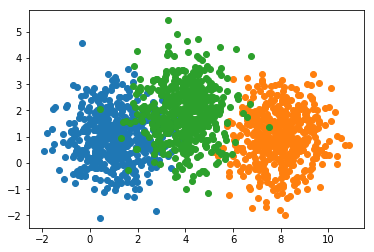

In [126]:
K = 3
X = generate_cluster(K = K)

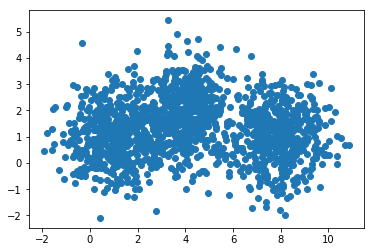

Centers kmeans:
[[7.97237302 0.97932248]
 [4.02955506 1.92578671]
 [0.91638433 0.99435314]]


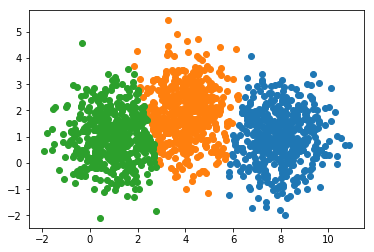

In [128]:
plt.plot(X[:,0], X[:,1], 'o')
plt.show()
kmeans = kMeans(X, K)
kmeans.run()
(centers, labels, it) = kmeans.result()
print('Centers kmeans:')
print(centers[-1])
kmeans_display(X, labels[-1])

## Bên cạnh đó có 1 giải thuật cũng tương tự như k-Means đó chính là K-mediods, khác biệt của 2 giải thuật này đó là cách chọn đại diện cho cluster. Cụ thể hơn đó chính là với k-means thì chọn giá trị trung bình làm đại diện thì với k-mediods lại dùng cụ thể 1 điểm dữ liệu trong cluster làm giá trị đại diện

In [48]:
class kMediods:
    
    '''Khởi tạo Object kMeans với 2 tham số data và số lớp k'''
    def __init__(self, data, K=2):
        
        if(K >X.shape[0]):
            
            raise ValueError('k is %d need to less than or equal to %d' % (k,X.shape[0]))
        
        else:
            self.data = data
            self.K = K
            self.labels = None
            self.centers = None
            self.new_labels = None
            self.new_centers = None
            
            
    def get_init_index(self):
        # randomly pick k rows of X as initial centers
        data_len = self.data.shape[0]
        indexs_ = np.random.choice(data_len, self.K, replace=False)
        return indexs_
            
    def assign_labels(self):
        # calculate pairwise distances btw data and centers
        D = cdist(self.data, self.new_centers)
        # return index of the closest center
        self.new_labels = np.argmin(D, axis = 1) #return indexs of minimun value by row
        
    def update_centers(self):
        centers_ = np.zeros((self.K, self.data.shape[1]))
        for k_ in range(self.K):
            # collect all points assigned to the k-th cluster 
            Xk = self.data[self.labels[-1] == k_ , :]
            # take average
            cluster_means = np.mean(Xk, axis = 0)
            D = cdist(Xk, [cluster_means])
            centers_[k_,:] = Xk[np.argmin(D, axis = 0)]
        self.new_centers = centers_
    
    '''Nếu như tập điểm mới trùng với cái cũ thì dừng lại'''
    def has_converged(self):
        return (set([tuple(a) for a in self.centers[-1]]) == set([tuple(a) for a in self.new_centers]))
    
    
    def run(self):
        self.itera = 0 
        self.labels = []
        self.centers = []
        
        '''Bước 1: Chọn ngẫu nhiên k dữ liệu để đại diện cho k nhóm'''
        self.new_centers = self.data[self.get_init_index()]
        self.centers.append(self.new_centers)
        
        while True:
            '''Bước 2: Tính toán khoảng cách của các điểm dữ liệu'''
            '''và gán nhãn cho chúng với khoảng cách so với center nào là bé nhất'''
            self.assign_labels()
            self.labels.append(self.new_labels)
            
            '''Bước 3: Tính mean cho từng cluster và cập nhật lại center bằng cách chọn điểm gần nhất với mean'''
            self.update_centers()
            
            '''Bước 4: kiểm tra bộ center mới cập nhật có bị trùng với bộ trước hay không'''
            '''Nếu không quay lại Bước 2'''
            if self.has_converged():
                break
            self.centers.append(self.new_centers)
            self.itera += 1
            
    
    def result(self):
        if self.labels is not None:
            return (self.centers, self.labels, self.itera)
        else:
            raise SytaxError('you don not have any result to get, check that at least you have call run() function one time.')

Centers:
[[8.00041421 0.99003645]
 [0.97889014 1.0198071 ]
 [4.00449072 1.99215867]]


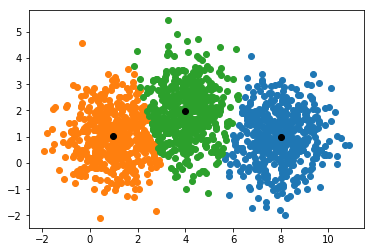

In [129]:
kmediods = kMediods(X, K)
kmediods.run()
(centers_mediods, labels_mediods, it_mediods) = kmediods.result()

print('Centers:')
print(centers_mediods[-1])
kmeans_display(X, labels_mediods[-1], kmediods=True, mediods_centers=centers_mediods[-1] )

### Nhược điểm:
- **Với k-means chúng ta cần xác định được số cluster `k` của bài toán**: trong thực tế trong rất nhiều trường hợp chúng ta hoàn toàn không thể biết được giá trị đó.
- **Giả định các giá trị của các dữ liệu chỉ nằm 1 nhóm**: trên các dữ liệu thực tế việc phân bô của các dữ liệu là rất phức tạp, nên việc các dữ liệu 2 cluster bị đè lên nhau hay 1 giá trị nằm ở khoảng cách giữa 2 trung tâm bị thực tế nằm lớp A nhưng bị phân nhầm sang lớp B là rất nhiều.
- **Các `cluster` tìm được sẽ phụ thuộc rất nhiều vào các `center` được khởi tạo ở ngay bước 1**
- **Các `cluster` cần có só lượng điểm dữ liệu xấp xỉ bằng nhau**

## Ví dụ về các nhược điểm của k-means và k-mediods

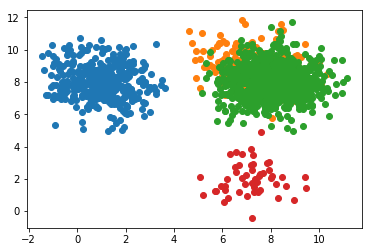

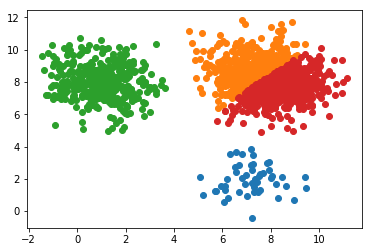

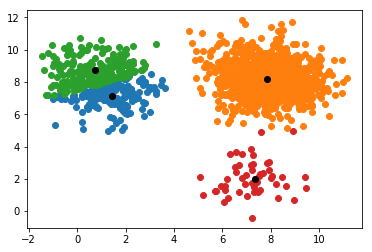

In [130]:
K = 4
N = [400, 200, 800, 50]
X = generate_cluster(K = K, N = N)
kmeans = kMeans(X, K)
kmeans.run()
(centers, labels, it) = kmeans.result()
kmeans_display(X, labels[-1])

kmediods = kMediods(X, K)
kmediods.run()
(centers_mediods, labels_mediods, it_mediods) = kmediods.result()
kmeans_display(X, labels_mediods[-1], kmediods=True, mediods_centers=centers_mediods[-1] )